# Optimization problem (heuristics) TSP challenge

1- solution representation, good one to start with

2- initial solution function

3- function to create the objective value

4- operator function (swap for example)

5- loop to manage the solver function

# TSP

travel to 10 cities in any order then go back home, always starting at city 1 amd always ending at city 1, and in between go to every other city, not nessecary city 1, can start with any city but must end at the starting city.

In [171]:
import random


# solution representation, a function to generate random list of cities
def init_route():
    # Initialize a list of 10 cities. Here each city is represented by a unique integer from 0 to 9.
    cities = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    # Shuffle the list of cities in place. This effectively creates a random route between the cities.
    random.shuffle(cities)

    # Add the first city to the end of the list. This is because in a round trip route, the start city and end city are the same.
    cities.append(cities[0])

    # Return the resulting list of cities, which represents a random round trip route.
    return cities



In [172]:
# calculate the distance for the route given
def calc_distance(paths):
    # distance_arr is a 2D matrix representing the distances between each pair of cities.
    # Each row of the matrix corresponds to a specific city. The elements of the row represent the distance to every other city.
    distance_arr = [
        [0, 191, 125, 178, 196, 107, 159, 182, 61, 52],
        [191, 0, 60, 141, 111, 111, 192, 98, 83, 57],
        [125, 60, 0, 189, 81, 198, 173, 102, 147, 68],
        [178, 141, 189, 0, 82, 54, 174, 120, 169, 79],
        [196, 111, 81, 82, 0, 170, 192, 96, 95, 102],
        [107, 111, 198, 54, 170, 0, 137, 124, 115, 122],
        [159, 192, 173, 174, 192, 137, 0, 50, 55, 80],
        [182, 98, 102, 120, 96, 124, 50, 0, 195, 104],
        [61, 83, 147, 169, 95, 115, 55, 195, 0, 94],
        [52, 57, 68, 79, 102, 122, 80, 104, 94, 0],
        ]

    #   Initialize a variable to hold the total distance of the path.
    distance_sum = 0

    # Loop over the indices in the paths list, stopping at the second to last index
    # since you'll be looking ahead one index on each iteration.
    for i in range(len(paths)-1):
        # Get the current city from the paths list
        city1 = paths[i]
        # Get the next city from the paths list
        city2 = paths[i+1]
        # Use these two cities to index into the distance_arr matrix
        # and get the distance between city1 and city2
        distance = distance_arr[city1][city2]
        # Uncomment the next two lines to print each pair of cities and their distance
        # print(city1, city2) #debugging
        # print(distance) #debugging
        # Add the distance to the running total
        distance_sum += distance
        
    # After the loop, return the total distance
    return distance_sum



In [173]:
path = init_route()
path

[0, 6, 5, 4, 2, 9, 7, 1, 3, 8, 0]

In [174]:
calc_distance(path)

1188

In [196]:
# Function to solve the problem using the first approach
def distance_solver1():
    # Initialize the paths with the starting routes
    paths = init_route()

    # Calculate the initial total distance of the paths using the calc_distance function
    # The goal is to minimize this distance
    lowest_distance = calc_distance(paths)

    # Variable to store the iteration number where the lowest distance was found
    lowest_distance_found_at = 0

    # Start a loop that will make 100000 attempts to find a better (shorter) path
    for i in range(100000):
        # For each attempt, generate a new set of paths
        paths = init_route()

        # Calculate the total distance for these new paths
        current_distance = calc_distance(paths)

        # If the new total distance is less than the current lowest distance,
        # update lowest_distance and store the iteration number where it was found
        if current_distance < lowest_distance:
            lowest_distance = current_distance
            lowest_distance_found_at = i
    # print(lowest_distance_found_at) # debugging 
    # print(paths) # debugging 
    # After all attempts, return the lowest distance found, the iteration where it was found, and the associated paths
    return lowest_distance



In [198]:
distance_solver1()

676

In [199]:
# the operator function, i used swap operator in this challenge
# swapping cities function
def city_swap(path, city1, city2):
    # Store the value of the city at the first given position (city1)
    value = path[city1]

    # Replace the city at the first position (city1) with the city at the second position (city2)
    path[city1] = path[city2]

    # Replace the city at the second position (city2) with the original city from the first position (stored in 'value')
    path[city2] = value

    # Return the updated path with the cities swapped
    return path


In [200]:
# approach 2 
def distance_solver2():
    # Generate an initial route for travelling between cities
    paths = init_route()

    # Calculate the total distance of the initial route
    lowest_distance = calc_distance(paths)
    # Initialize the iteration at which the lowest distance was found
    lowest_distance_found_at = 0

    # Initiate a loop that will run 100,000 times
    for i in range(100000):
        # Calculate the distance of the current route
        current_distance = calc_distance(paths)

        # If the distance of the current route is less than the lowest distance found so far,
        # update the lowest distance and the iteration at which it was found
        if current_distance < lowest_distance:
            lowest_distance = current_distance
            lowest_distance_found_at = i

        # Choose two random cities to swap their positions in the route
        # The random.choices function returns a list with one element from [1,2,3,4,5,6,7,8,9]
        city1_position = random.choice([1,2,3,4,5,6,7,8,9])
        city2_position = random.choice([1,2,3,4,5,6,7,8,9])

        # Swap the positions of the two cities in the route to generate a new route
        paths = city_swap(paths, city1_position, city2_position)
    # print(lowest_distance_found_at) # debugging
    # print(paths) # debugging
    # Return the lowest  distance found, the iteration at which it was found, and the corresponding route
    return lowest_distance





In [210]:
distance_solver2()

676

In [212]:
# acceptance criteria, hill climbing method to optimize the solution 
# accepting criteria is improving only, if old is better than new

def distance_solver3():
    # Initialize the routes
    paths = init_route()
    
    # Calculate the total distance of the initial route
    lowest_distance = calc_distance(paths)
    # Initialize the iteration where the lowest distance was found
    lowest_distance_found_at = 0
    
    # loop for 100,000 attempts
    for i in range(100000):
        # Calculate the total distance for the current route configuration
        current_distance = calc_distance(paths)
        
        # If the current distance is less than the lowest recorded distance,
        # update the lowest distance and record the iteration
        if current_distance < lowest_distance:
            lowest_distance_found_at = i
            lowest_distance = current_distance 
            
        # Select two cities randomly by their position to swap
        city1_position = random.choice([1,2,3,4,5,6,7,8,9])
        city2_position = random.choice([1,2,3,4,5,6,7,8,9])
        
        # Swap the two selected cities in the path
        paths = city_swap(paths, city1_position, city2_position)
        
        # If the distance after swap is more than the lowest recorded distance and it's not the first iteration,
        # revert the swap to the previous configuration
        if current_distance > lowest_distance and i != 0:
            # Swap back the cities
            paths = city_swap(paths, city1_position_old, city2_position_old)
        else:
            # If the swap improved the distance or it's the first iteration,
            # keep the swap and update the positions of swapped cities for potential future reversion
            city1_position_old = city1_position
            city2_position_old = city2_position
            
    # Return the lowest distance found, the iteration where it was found, and the final configuration of the path
    # print(lowest_distance_found_at)  # DEBUGGING
    # print(paths) # DEBUGGING
    return lowest_distance 


In [213]:
distance_solver3()

676

In [214]:

distances1 = []
distances2 = [] 
distances3 = []

for i in range(31):   
    distances1.append(distance_solver1())
    distances2.append(distance_solver2())
    distances3.append(distance_solver3())
    
    

print(distances1)
print(distances2)
print(distances3)


avg_distance1 = sum(distances1) / 31
avg_distance2 = sum(distances2) / 31
avg_distance3 = sum(distances3) / 31

print(f"Average distance for Solver 1 over {31} runs: {avg_distance1}")
print(f"Average distance for Solver 2 over {31} runs: {avg_distance2}")
print(f"Average distance for Solver 3 over {31} runs: {avg_distance3}")

   



[676, 689, 676, 699, 689, 676, 676, 689, 689, 699, 705, 676, 689, 712, 689, 676, 689, 676, 676, 676, 711, 689, 676, 700, 699, 676, 676, 699, 676, 700, 676]
[689, 676, 676, 676, 676, 699, 689, 707, 676, 699, 699, 676, 689, 676, 699, 700, 699, 689, 699, 700, 676, 676, 699, 700, 707, 676, 689, 689, 676, 676, 689]
[689, 676, 676, 699, 699, 676, 676, 689, 676, 676, 689, 676, 700, 711, 676, 676, 689, 676, 676, 699, 676, 676, 700, 705, 676, 707, 676, 689, 699, 689, 699]
Average distance for Solver 1 over 31 runs: 687.0967741935484
Average distance for Solver 2 over 31 runs: 688.4516129032259
Average distance for Solver 3 over 31 runs: 686.8387096774194


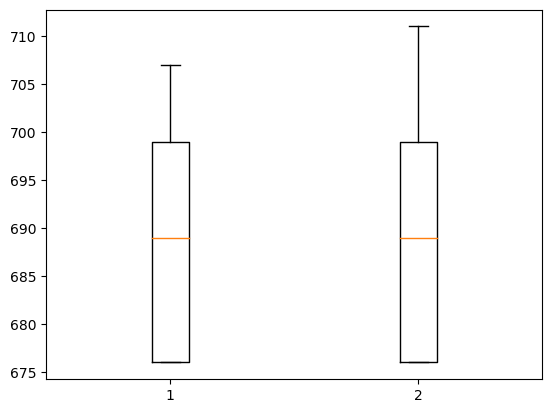

In [221]:
# now boxplot to compare distance solver2 and 3 because one was the shuffle approach (non-heauristic)

# plt.figure(figsize=(5, 10))
plt.boxplot([distances2, distances3])
plt.show()


### Comment on the boxplot above compairing distance solver2 and 3 because 1 was the shuffle approach (non-heauristic)

From the given data, it can be seen that `distance_solver2` and `distance_solver3` have quite close average results, with the latter slightly outperforming the former. The key difference between the two algorithms is in their acceptance criteria: `distance_solver2` accepts any new path regardless of whether it's better or worse, whereas `distance_solver3` only accepts a new path if it's shorter than the current path (unless it's the first iteration). This makes `distance_solver3` a hill-climbing algorithm, which is prone to getting stuck in local optima - it could find a good solution quickly, but there may be a better solution that it will never reach because doing so would involve initially moving to a worse solution. On the other hand, `distance_solver2`, by accepting any new path, explores a wider range of solutions and may find better ones over time, albeit at a slower pace. However, it seems that in this particular case, despite its simplicity and the wider exploration, `distance_solver2` doesn't significantly outperform `distance_solver3` in terms of the average distance achieved over multiple runs. This might be due to the specific characteristics of the problem instance, including the number of cities and the distances between them.
